# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project: Predicting Boston Housing Prices


## Getting Started
In this project, I will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# import scikit-learn as sklearn
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape)) 

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, I will make a cursory investigation about the Boston housing data and provide your observations. 

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Calculate Statistics

In the code cell below, these are implemented:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [3]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


- 'RM' stands for the averager number of rooms, the more rooms in a house, the higher value is of the house. 
- 'LSTAT' stands for the percentage of homeowners in the neighborhood considered "lower class". The higher LSTAT is, more homeowners are lower class, the house conditions and the school distric are worse, which will decrease the house value.
- 'PTRATIO' stands for the ratio of students to teachers in primary and secondary schools in the neighborhood. Considering most primary and secondary shools are public schools, the higher students to teachers ratio is, the lower teachers get paid and ultimately leads to a worse school district. Therefore, higher 'PRTATIO' lead to a decrease in house value. 

----

## Developing a Model
In this second section of the project, tools and techniques necessary for a model are developed to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in predictions.

### Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will calculate the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, thesee are needed to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [7]:
# Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

The model has successfully captured the variation of the target variable since the closer R2 score to 1, the better it predicts. 0.923 is pretty close to 1, therefore, this model well predicts the target variable.

### Shuffle and Split Data
The next implementation is to take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, these are implemented:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [9]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split
# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,train_size=0.8,test_size=0.2,random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Training and Testing

The benefit to splitting a dataset into a rational ratio of training and testing is, testing data will give an estimation of performance based on independent and serves as check on model overfitting. 

----

## Analyzing Model Performance
In this third section of the project, several models' learning and testing performances are compared based on various subsets of training data. Additionally, I'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing the model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

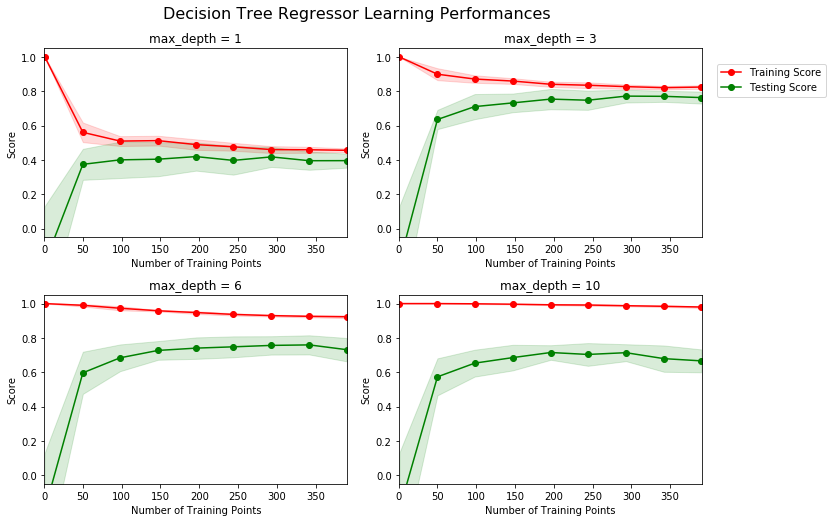

In [10]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Learning the Data

Figure max_depth = 3
As more training points are added, the score of training curve converged at 0.8 with 300 data points. The testing curve also converged to its optimal score. As more training points are added, the model receiving very minor increases in performance. Also note that collecting more data can often be time consuming and/or expensive. Therefore, it is not necessary to have more training points.  

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

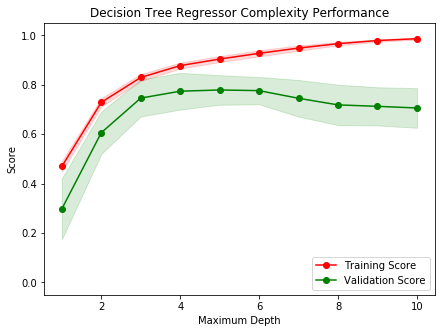

In [11]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

1. When the model is at a max depth of 1, it suffers from high bias because both training and validation scores are low. The training score is 0.45 and validation score is 0.3. 

2. The model suffers from high variance when the model is training with max depth as 10. The training score is very high close to 1. But the validation decreased to 0.7. The difference between training and validation sets grows for regressors that max depth larger than 3. Therefore, regressor have max depth in 10 is high variance.   

### Best-Guess Optimal Model
* Max depth at 4 results in a model that best generalizes to unseen data. 
* The validation score reaches the maximum at max_depth = 4, which means this is an optimized model considering both traing and validation scores. 

-----

## Evaluating Model Performance
In this final section of the project, I will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Grid Search
Grid search is simply an exhaustive searching through a manually specified subset of the hyperparameter space of a learning algorithm. (Wikipedia)

In this project, 10 different values from 1 to 10 for max_depth have been passed to grid search. We are asking to run the decision tree regressor for each value of max_depth. We first fit the regressor with max_depth=1, evaluate the model based on R2 score. Then we do the same for max_depth=2 and so on. At the end, the highest scoreing max depth will be returned. 

### Cross-Validation

K-fold cross validation is splitting training data into K folds, in which (K-1) folds are used as training data and 1 fold is used as validation data. Train the model on K-1 folds data and then test the model in the 1 fold. The cross validation process is then repeated K times (the folds), with each of fold used once as the validation data. The average error from each run is the cross validation error.

The main drawback of grid search is high bias if a particular subset of data for training or testing is hinged upon. Using K-fold cross validation matters less on how the data gets divided and reduces bias. Each data point gets to be in a validation set once, and gets to be in a training set K-1 times. The variance of the model is reduced as K is increased. 

For grid search, the data is seperated into two parts: model selection and testing. The model selection part is devided into K-fold, and gives an averaged error from running K times of the validation fold. Compare the error from each algorithm, and choose the best algorithm. Then use all model selection data to train this algorithm and test on the untouched testing data. The one last final score from K-fold is the result of testing data in chosen model.

### Fitting a Model
The final implementation requires train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, the model is trained using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, `ShuffleSplit()` is used for an alternative form of cross-validation. While it is not the K-Fold cross-validation technique, this type of cross-validation technique is also useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*. 

For the `fit_model` function in the code cell below, these are implemented as following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [23]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params={"max_depth":list(range(1,11))}
    

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    grid = GridSearchCV(regressor,params, scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


In [22]:
params={"max_depth":list(range(1,11))}
print(params)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. 

### Optimal Model

The code block below fits the decision tree regressor to the training data and produce an optimal model. The optimal depth is 5. My guess in question is 4 based on the highest validation score. 5 is a better optimal model since it was selected based on K-fold CV. K-fold CV matters less on how data is devided and reduces bias. 

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


### Predicting Selling Prices
Imagine that I was a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. I have collected the following information from three clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.

After Running the code block below, the recommended selling price for Client 1 at \$419,700.00, Client 2 at \$287,100.00 and Client 3 at \$927,500.00. 

These are fairly reasonable predictions. 
The higher room number (RM), the lower poverty level(LSTAT) and lower student to teacher ratio(PTRATIO) leads to a higher house selling price. Compare the three clients, Client 3 has the biggest house located at lowest poverty area with lowest student to teacher ratio. Client 2 has the smallest house at highest poverty level area and highest student to teacher ratio. Therefore, Client 3 has the highest selling price, Client 2 has the lowest selling price. 

In [10]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)): #why you cicutan iterate i and price in reg.predict()? 
    #Not definded predict function! why?
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $419,700.00
Predicted selling price for Client 2's home: $287,100.00
Predicted selling price for Client 3's home: $927,500.00


In [24]:
features.describe()

,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [99]:
#vs.PredictTrials(features, prices, fit_model, client_data)

#client 1
vs.PredictTrials(features, prices, fit_model, [[5,17,15]])


Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


In [100]:
#client 2
vs.PredictTrials(features, prices, fit_model, [[4,32,22]])


Trial 1: $189,123.53
Trial 2: $284,200.00
Trial 3: $236,478.26
Trial 4: $235,122.22
Trial 5: $218,540.00
Trial 6: $235,620.00
Trial 7: $238,132.08
Trial 8: $229,200.00
Trial 9: $243,857.89
Trial 10: $228,385.71

Range in prices: $95,076.47


In [101]:
#client3
vs.PredictTrials(features, prices, fit_model, [[8,3,12]])

Trial 1: $942,666.67
Trial 2: $927,500.00
Trial 3: $888,720.00
Trial 4: $896,280.00
Trial 5: $854,700.00
Trial 6: $922,740.00
Trial 7: $896,962.50
Trial 8: $979,300.00
Trial 9: $904,718.18
Trial 10: $941,220.00

Range in prices: $124,600.00


### Applicability

The features present in the data are not sufficient, since other factors should also be considered the built year of the house, applicances, yard size, appearance of the house,garage size, etc.

The model is not robust enough since the range of the predicted price is too wide, especially for cheaper houses. 

The data collected from urban city is affected by the limited source of the land, population and traffic conditions and so on, which are not applicable in a rural city. Therefore, the data collected in an urban city like Boston can not be applicable in a rural city. 

It is not fair to judge the price of an individual home based on the characteristics of the entire neighborhood since the house might be significantly different from the aspects of size, maintaince, applicance, etc.

The cheapest price of 4 bedrooms sfh in Boston in 2017 is \$300,000. This price is a bit more than the max price of client #2 at Trial 2 (\$284200). The inflation definitely plays a role to increase the house price, however, it is not very important. 
Link https://www.zillow.com/homes/for_sale/Boston-MA/fsba,fsbo_lt/house_type/59160556_zpid/44269_rid/4-_beds/pricea_sort/42.619812,-70.530167,42.007468,-71.409073_rect/9_zm/0_mmm/